In [1]:
import os
import sys
import json
import subprocess
from datetime import datetime, timedelta
from urllib.request import urlopen

# Collab setup from one click above
if "google.colab" in sys.modules:
    from google.colab import userdata
    %pip install parcllabs plotly kaleido
    api_key = userdata.get('PARCL_LABS_API_KEY')
else:
    api_key = os.getenv('PARCL_LABS_API_KEY')

In [2]:
import parcllabs
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from parcllabs import ParclLabsClient

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


print(f"Parcl Labs Version: {parcllabs.__version__}")

Parcl Labs Version: 0.4.0


In [3]:
# Let's get total housing supply for the US

# Initialize the Parcl Labs client
client = ParclLabsClient(api_key)

market_df = client.search_markets.retrieve(
    sort_by='TOTAL_POPULATION',
    sort_order='DESC',
    as_dataframe=True,
    params={'limit': 1},  # expand the default limit to 14, as of this writing, 14 markets are available
)

In [4]:
us_parcl_id = market_df['parcl_id'].values[0]

start_date = '2022-09-01'

# get total inventory
for_sale_inventory = client.for_sale_market_metrics_for_sale_inventory.retrieve(
    parcl_id=us_parcl_id,
    start_date=start_date,
    as_dataframe=True,
    params={
        'limit': 100
    }
)

for_sale_inventory

,date,for_sale_inventory,parcl_id
0,2024-05-27,1038764,5826765
1,2024-05-20,1044918,5826765
2,2024-05-13,1013473,5826765
3,2024-05-06,995607,5826765
4,2024-04-29,973452,5826765
...,...,...,...
86,2022-10-03,578151,5826765
87,2022-09-26,583000,5826765
88,2022-09-19,575952,5826765
89,2022-09-12,565995,5826765


<Axes: title={'center': 'Total Inventory'}, xlabel='date'>

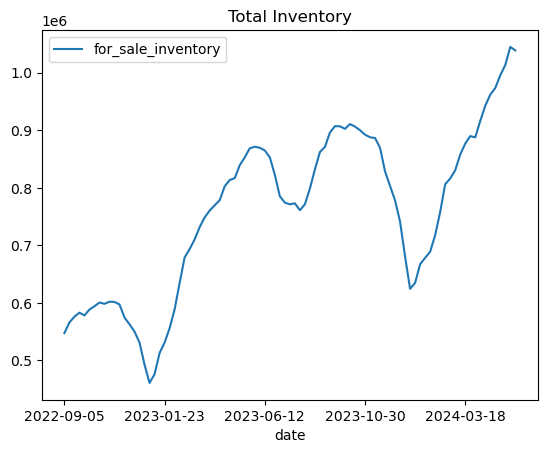

In [5]:
for_sale_inventory.sort_values('date').plot(x='date', y='for_sale_inventory', title='Total Inventory')

In [6]:
import sys

cur_dir = os.getcwd()
chart_dir = os.path.join(cur_dir, '../..')

sys.path.append(chart_dir)

from charting.utils import build_line_chart

In [20]:
import os
from datetime import datetime

import pandas as pd
import plotly.graph_objects as go


labs_logo_lookup = {
    'blue': 'https://parcllabs-assets.s3.amazonaws.com/powered-by-parcllabs-api.png',
    'white': 'https://parcllabs-assets.s3.amazonaws.com/powered-by-parcllabs-api-logo-white+(1).svg'
}

# Set charting constants
labs_logo_dict = dict(
    source=labs_logo_lookup['white'],
    xref="paper",
    yref="paper",
    x=0.475,  # Centering the logo below the title
    y=1.04,  # Adjust this value to position the logo just below the title
    sizex=0.15, 
    sizey=0.15,
    xanchor="center",
    yanchor="bottom",
)


def build_line_chart(
    data: pd.DataFrame,
    title: str = None,
    x_axis_title: str = None,
    y_axis_title: str = None,
    save_path: str = None,
    value_name: str = None
):
    HEIGHT = 900
    WIDTH = 1600
    
    fig = go.Figure()

    # Plot the entire series with a single blue line
    fig.add_trace(go.Scatter(
        x=data['date'],
        y=data[value_name],
        mode='lines',
        line=dict(width=2, color='#57A3FF'),  # Blue line
        showlegend=False
    ))

    fig.add_layout_image(labs_logo_dict)
    
    fig.update_layout(
        margin=dict(l=0, r=0, t=110, b=0),
        height=HEIGHT,
        width=WIDTH,
        title={
            'text': title,
            'y': 0.99,
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top',
            'font': dict(size=28, color='#FFFFFF'),
        },
        plot_bgcolor='#000000',  # Dark background for better contrast
        paper_bgcolor='#000000',  # Dark background for the paper
        font=dict(color='#FFFFFF'),
        xaxis=dict(
            title_text=x_axis_title,
            showgrid=False,  # Disable vertical grid lines
            tickangle=-45,
            tickfont=dict(size=14),
            linecolor='rgba(255, 255, 255, 0.7)',  # Axis line color with opacity
            linewidth=1  # Axis line width
        ),
        yaxis=dict(
            title_text=y_axis_title,
            showgrid=True,
            gridwidth=0.5,  # Horizontal grid line width
            gridcolor='rgba(255, 255, 255, 0.2)',  # Horizontal grid line color with opacity
            tickfont=dict(size=14),
            tickprefix='',  # Add dollar sign to y-axis labels
            zeroline=False,
            linecolor='rgba(255, 255, 255, 0.7)',  # Axis line color with opacity
            linewidth=1  # Axis line width
        ),
        hovermode='x unified',  # Unified hover mode for better interactivity
        hoverlabel=dict(
            bgcolor='#1F1F1F',
            font_size=14,
            font_family="Rockwell"
        )
    )

    if save_path:
        fig.write_image(save_path, width=WIDTH, height=HEIGHT)
    
    # Show the plot
    fig.show()

In [22]:
build_line_chart(
    data=for_sale_inventory,
    title='USA Total Housing Inventory',
    y_axis_title='Total Inventory',
    value_name='for_sale_inventory',
    save_path='total_inventory.png'
)

In [ ]:
root = f'../../graphics/{pf_type}'
    # timestamp
    timestamp = datetime.now().strftime('%Y-%m-%d')
    # join the path
    path = os.path.join(root, timestamp)
    if not os.path.exists(path):
        os.makedirs(path)